In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from collections import Counter
from sklearn.model_selection import train_test_split


In [17]:
dataset = pd.read_csv('C:/Users/bahld/python programs/Stats_New/linear regression/Mumbai.csv')

In [18]:
dataset.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [19]:
dataset.shape

(7719, 40)

In [20]:
dataset.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,7.719000e+03,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,...,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000
mean,1.506165e+07,998.409250,1.913331,0.647105,7.498899,7.473896,7.437881,7.441638,7.439435,7.477005,...,7.518331,7.417930,7.454722,7.372069,7.379712,7.379065,7.373624,7.374530,7.383988,7.374789
std,2.052100e+07,550.967809,0.855376,0.477901,3.197923,3.252095,3.328245,3.320401,3.325002,3.245418,...,3.155041,3.369523,3.292904,3.462108,3.446892,3.448185,3.459020,3.457217,3.438345,3.456702
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.300000e+06,650.000000,1.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,9.500000e+06,900.000000,2.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.700000e+07,1177.000000,2.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,4.200000e+08,8511.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [21]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [22]:
dataset.corr().T

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.299172,0.272048,-0.046493,-0.011882,-0.007093,-0.003388,-0.005336,-0.007419,-0.006354,...,-0.006345,-0.007462,-0.009311,-0.007356,-0.006855,-0.006431,-0.007113,-0.006888,-0.005310,-0.006503
Area,0.299172,1.000000,0.810016,-0.024114,-0.067163,-0.059166,-0.055341,-0.059304,-0.057962,-0.059207,...,-0.062248,-0.066685,-0.060530,-0.064727,-0.063139,-0.064299,-0.064861,-0.064830,-0.063748,-0.064410
No. of Bedrooms,0.272048,0.810016,1.000000,-0.113498,-0.026347,-0.018536,-0.016159,-0.020508,-0.018633,-0.019177,...,-0.021616,-0.025417,-0.021518,-0.024417,-0.023334,-0.024222,-0.024394,-0.024511,-0.023574,-0.024157
Resale,-0.046493,-0.024114,-0.113498,1.000000,-0.110552,-0.121058,-0.124162,-0.127375,-0.126384,-0.117759,...,-0.121427,-0.112450,-0.123117,-0.119225,-0.121260,-0.118051,-0.119000,-0.119025,-0.117489,-0.118988
MaintenanceStaff,-0.011882,-0.067163,-0.026347,-0.110552,1.000000,0.995929,0.995428,0.995614,0.995777,0.996992,...,0.996912,0.997432,0.996221,0.998045,0.997873,0.997904,0.997928,0.997881,0.997661,0.997830
Gymnasium,-0.007093,-0.059166,-0.018536,-0.121058,0.995929,1.000000,0.998401,0.997343,0.998024,0.995718,...,0.997847,0.997012,0.997034,0.997828,0.997864,0.997193,0.997801,0.997718,0.997034,0.997752
SwimmingPool,-0.003388,-0.055341,-0.016159,-0.124162,0.995428,0.998401,1.000000,0.998251,0.999052,0.997438,...,0.997770,0.995403,0.998297,0.998008,0.998158,0.997503,0.998018,0.997941,0.997452,0.997979
LandscapedGardens,-0.005336,-0.059304,-0.020508,-0.127375,0.995614,0.997343,0.998251,1.000000,0.998341,0.996862,...,0.997702,0.995414,0.998117,0.997945,0.998116,0.997427,0.997941,0.997885,0.997333,0.997911
JoggingTrack,-0.007419,-0.057962,-0.018633,-0.126384,0.995777,0.998024,0.999052,0.998341,1.000000,0.997669,...,0.997826,0.995113,0.998780,0.997997,0.998153,0.997487,0.997973,0.997895,0.997330,0.997932
RainWaterHarvesting,-0.006354,-0.059207,-0.019177,-0.117759,0.996992,0.995718,0.997438,0.996862,0.997669,1.000000,...,0.996654,0.994916,0.997631,0.997829,0.997842,0.997762,0.997788,0.997727,0.997643,0.997737


In [23]:
#sns.distplot(dataset['Paved_Highways'])

X = dataset.loc[:, dataset.columns != "Price"]
y = dataset.loc[:, dataset.columns == "Price"]

In [24]:
# Create a dataframe for numeric features
num=X.select_dtypes(include='number')

# Create a dataframe for categorical features
char=X.select_dtypes(include='object')


In [25]:
char_encode=pd.get_dummies(char)

In [26]:
X_all=pd.concat([num,char_encode],axis=1,join='inner')

In [27]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)

    
    
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)
   
    

In [28]:
X_all.size


3481269

In [29]:
y.size

7719

In [30]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_all,y)

In [31]:
X_train=X_train_scaled
X_test=X_test_scaled

In [32]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=24)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(X_train.shape)
print(y_train.shape)
regressor.fit(X_train, y_train)

(5403, 451)
(5403,)


LinearRegression()

In [34]:
regressor.coef_

array([ 1.50128132e+06,  1.44258651e+06, -6.38751844e+05, -9.93017186e+05,
       -1.32032183e+07,  2.43377690e+07, -2.27162055e+06, -8.76008921e+06,
        1.17453955e+07,  1.21019055e+07, -7.15748556e+06,  3.32846451e+06,
       -4.93819197e+06, -4.67895777e+06, -4.23026382e+06, -3.76934923e+06,
       -1.54493154e+07,  3.21348168e+06, -6.66902501e+06,  2.50746173e+06,
       -6.15436575e+06,  1.17888160e+06,  1.20768855e+07, -3.74615970e+06,
        1.12867755e+06,  4.02447455e+07, -9.10659279e+06,  2.29403427e+06,
        4.14279375e+06,  1.23334138e+07, -1.50610146e+07, -6.23714084e+07,
        1.76408800e+07, -2.29246539e+07,  1.92264166e+07,  8.82477844e+06,
        4.92568336e+03,  1.45570325e+07, -1.17009539e+19, -8.09434908e+17,
        4.33162300e+19, -5.72409896e+17, -2.42470523e+18,  2.53611655e+19,
       -5.72409896e+17, -5.72409896e+17, -2.06155964e+18, -2.13918307e+18,
       -5.72409896e+17, -5.72409896e+17, -5.72409896e+17, -1.80861052e+18,
       -4.89067230e+18, -

In [35]:
coeff_df = pd.DataFrame(regressor.coef_, X_all.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Area,1.501281e+06
No. of Bedrooms,1.442587e+06
Resale,-6.387518e+05
MaintenanceStaff,-9.930172e+05
Gymnasium,-1.320322e+07
...,...
Location_vasant vihar thane west,-9.912595e+17
Location_vile parle west,-1.401463e+18
Location_vrindavan society,0.000000e+00
Location_worli sea Fase,0.000000e+00


In [36]:
regressor.intercept_

15193388.49512607

In [37]:
y_pred = regressor.predict(X_train)
print(y_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

[ 4600000  9496000 16399999 ... 11500000  5300000  4700000]


,Actual,Predicted
0,4600000,1.130304e+07
1,9496000,1.269670e+07
2,16399999,1.947865e+07
3,12600000,9.762940e+06
4,11100000,1.303731e+07
...,...,...
5398,11299999,1.256051e+07
5399,6500000,1.515840e+07
5400,11500000,2.184204e+07
5401,5300000,7.129212e+06


Text(0, 0.5, 'Residuals')

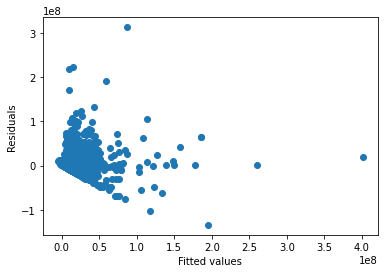

In [38]:
# Validating OLS Assumptions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [39]:
(y_train-y_pred).mean()

6232.463785646366

Text(0.5, 0, 'Residuals')

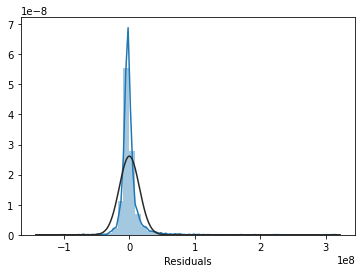

In [40]:
sns.distplot(y_train-y_pred , fit=norm);
plt.xlabel('Residuals')

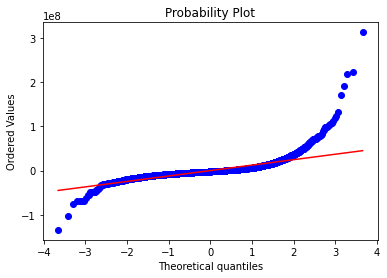

In [41]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [42]:
import statsmodels.api as sm

In [43]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)

In [44]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [45]:
res.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     9.803
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:05:07   Log-Likelihood:                -97016.
No. Observations:                5403   AIC:                         1.948e+05
Df Residuals:                    5008   BIC:                         1.974e+05
Df Model:                         394                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.519e+07   2.15e+05     70.723      0.000    1.48e+07    1.56e+07
x1          1.501e+06   4.26e+05      3.524      0.000    6.66e+05    2.34e+06
x2          1.447e+06    4.2e+05      3.448      0.001    6.24e+05    2.27e+06
x3         -6.406e+05   2.69e+05     -2.381      0.017   -1.17e+06   -1.13e+05
x4         -7.798e+05   5.52e+06     -0.141      0.888   -1.16e+07       1e+07
x5          -1.23e+07   7.98e+06     -1.541      0.123   -2.79e+07    3.34e+06
x6          2.405e+07   8.19e+06      2.937      0.003       8e+06    4.01e+07
x7         -2.533e+06   5.73e+06     -0.442      0.659   -1.38e+07     8.7e+06
x8         -8.546e+06   9.03e+06     -0.946      0.344   -2.62e+07    9.16e+06
x9          1.147e+07   6.35e+06      1.807      0.071   -9.72e+05    2.39e+07
x10         1.156e+07   6.83e+06      1.692      0.091   -1.83e+06     2.5e+07
x11        -7.034e+06   9.66e+06     -0.728      0.467    -2.6e+07    1.19e+07
x12         3.925e+06   6.26e+06      0.626      0.531   -8.36e+06    1.62e+07
x13        -5.032e+06   7.29e+06     -0.690      0.490   -1.93e+07    9.26e+06
x14        -5.243e+06   1.33e+07     -0.393      0.694   -3.14e+07    2.09e+07
x15        -4.456e+06   6.65e+06     -0.670      0.503   -1.75e+07    8.57e+06
x16        -4.472e+06   1.78e+07     -0.252      0.801   -3.93e+07    3.04e+07
x17        -1.509e+07   1.01e+07     -1.487      0.137    -3.5e+07     4.8e+06
x18         4.035e+06   8.51e+06      0.474      0.635   -1.26e+07    2.07e+07
x19        -7.522e+06   1.11e+07     -0.678      0.498   -2.93e+07    1.42e+07
x20         2.259e+06   7.84e+06      0.288      0.773   -1.31e+07    1.76e+07
x21        -5.958e+06   8.43e+06     -0.707      0.480   -2.25e+07    1.06e+07
x22         2.228e+06   6.73e+06      0.331      0.741    -1.1e+07    1.54e+07
x23         1.369e+07   1.84e+07      0.745      0.456   -2.23e+07    4.97e+07
x24        -8.229e+06   3.46e+07     -0.238      0.812   -7.61e+07    5.97e+07
x25         1.445e+06   7.31e+06      0.198      0.843   -1.29e+07    1.58e+07
x26         4.103e+07   1.92e+07      2.139      0.032    3.42e+06    7.86e+07
x27        -9.079e+06   8.26e+06     -1.099      0.272   -2.53e+07    7.11e+06
x28         1.861e+06   6.61e+06      0.282      0.778   -1.11e+07    1.48e+07
x29         3.913e+06   6.73e+06      0.582      0.561   -9.27e+06    1.71e+07
x30         1.157e+07   1.05e+07      1.100      0.271   -9.04e+06    3.22e+07
x31        -1.569e+07    7.1e+06     -2.208      0.027   -2.96e+07   -1.76e+06
x32        -6.145e+07   2.76e+07     -2.224      0.026   -1.16e+08   -7.29e+06
x33         1.699e+07   1.18e+07      1.441      0.150   -6.12e+06    4.01e+07
x34        -2.217e+07   1.73e+07     -1.284      0.199    -5.6e+07    1.17e+07
x35         1.716e+07   3.08e+07      0.557      0.577   -4.32e+07    7.75e+07
x3

In [46]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 1.6535986009247263e+18
Mean Squared Error: 1.684396533814938e+38
Root Mean Squared Error: 1.2978430312695515e+19


In [47]:
pd.set_option('max_columns', None)
X_all

#SportsFacility,PowerBackup,Cafeteria,Gasconnection,VaastuCompliant,


#maintaninence staff,gymnsium,landscapedgardens,rainwaterharvesting,indoorgames,shoppingmall,intercom,atm,clubhouse,school,24*7security
#carparking,staffquarter,multipurposeroom,hospital,washingmachine,ac,wifi,childrenpalayarea,liftavailable,bed,golfcourse,tv,
#diningtable,sofa,wardrobe,refrigeratorX_

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Location_15th Road,Location_4 Bunglows,Location_Adaigaon,Location_Agripada,Location_Airoli,Location_Akurli Nagar,Location_Almeida Park,Location_Ambarnath,Location_Ambernath East,Location_Ambernath West,Location_Ambivali,Location_Ambivli,Location_Anand Nagar Thane West,Location_Andheri,Location_Andheri East,Location_Andheri West,Location_Anjurdive,Location_Antop Hill,Location_Asangaon,Location_Badlapur,Location_Badlapur East,Location_Badlapur West,Location_Balkum,Location_Bandra East,Location_Bandra Kurla Complex,Location_Bandra West,Location_Bangur Nagar,Location_Belapur,Location_Beturkar Pada,Location_Bhakti Park,Location_Bhandup West,Location_Bhayandar East,Location_Bhayandar West,Location_Bhayandarpada,Location_Bhiwandi,Location_Bhoiwada Kalyan,Location_Boisar,Location_Borivali,Location_Borivali East,Location_Borivali West,Location_Breach Candy,Location_Byculla,Location_CBD Belapur East,Location_Central Avenue,Location_Chandivali,Location_Charkop,Location_Charkop Sector 8,Location_Chedda Nagar,Location_Chembur,Location_Chembur East,Location_Chembur Shell Colony,Location_Churchgate,Location_DN Nagar Road,Location_Dadar East,Location_Dadar West,Location_Dahisar,Location_Dahisar East,Location_Dahisar W,Location_Dahisar West,Location_Dattapada,Location_Deonar,Location_Devidas Cross Lane,Location_Dharavi,Location_Diamond Market Road,Location_Diva,Location_Diva Gaon,Location_Dokali Pada,Location_Dombivali,Location_Dombivali East,Location_Dombivli (West),Location_Dronagiri,Location_Eastern Express Highway Vikhroli,Location_Four Bungalows,Location_Four Bunglows,Location_Gandhar Nagar,Location_Ganesh Nagar,Location_Ghansoli,Location_Ghatkopar,Location_Ghatkopar East,Location_Ghatkopar West,Location_Ghodbunder Road,Location_Girgaon,Location_Godrej Hill,Location_Goregaon,Location_Goregaon (East),Location_Goregaon East,Location_Goregaon West,Location_Govandi,Location_Govind nagar,Location_Grant Road West,Location_Greater Khanda,Location_Gulal Wadi,Location_Gulmohar Road,Location_Gundavali Gaothan,Location_Haji Ali,Location_Hanuman Chowk,Location_Hanuman Nagar,Location_Haridas Nagar,Location_Haware City,Location_Hiranandani Estates,Location_Hiranandani Meadows,Location_I C Colony,Location_IT Colony,Location_Jankalyan Nagar,Location_Jawahar Nagar,Location_Jeejamata Nagar,Location_Jogeshwari East,Location_Jogeshwari West,Location_Juhu,Location_KASHELI,Location_Kalamboli,Location_Kalpataru,Location_Kalwa,Location_Kalyan,Location_Kalyan East,Location_Kalyan West,Location_Kamothe,Location_Kamothe Sector 16,Location_Kandivali East,Location_Kandivali West,Location_Kanjurmarg,Location_Kanjurmarg East,Location_Kannamwar Nagar II,Location_Kapur Bawdi,Location_Kapurbawadi,Location_Karanjade,Location_Karave Nagar,Location_Karjat,Location_Kasar vadavali,Location_Kasheli,Location_Katrap,Location_Kewale,Location_Khalapur,Location_Khar,Location_Khar West,Location_Kharegaon,Location_Kharghar,Location_Kharghar Sector 34C,Location_Kharodi,Location_Khopoli,Location_Koldongri,Location_Kolshet Industrial Area,Location_Kolshet Road,Location_Kondivita Road,Location_Kopar Khairane Sector 19A,Location_Kopara,Location_Koparkhairane Station Road,Location_Koper Khairane,Location_Koproli,Location_Krishanlal Marwah Marg,Location_Kulupwadi,Location_Kurla,Location_Kurla East,Location_Kurla West,Location_Link Road,Location_Lokhandwala,Location_Lokhandwala Township,Location_Lower Parel,Location_MG Road,Location_MHADA Colony 20,Location_Magathane,Location_Mahalaxmi,Location_Maharashtra Nagar,Location_Mahatma Gandhi Road,Location_Mahim,Location_Majiwada

In [48]:
#dataset['interaction_term']=dataset['Area']*dataset['No. of Bedrooms']

In [49]:
#Removed variables with p value >0.05
X = dataset.loc[:,['Area','Location','No. of Bedrooms','Resale','SwimmingPool','AC','VaastuCompliant']]
y = dataset.loc[:, dataset.columns == "Price"]

In [50]:
# Create a dataframe for numeric features
num=X.select_dtypes(include='number')

# Create a dataframe for categorical features
char=X.select_dtypes(include='object')


In [51]:
char_encode=pd.get_dummies(char)

In [52]:
X_all=pd.concat([num,char_encode],axis=1,join='inner')

In [53]:


X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_all,y)

In [54]:
X_train=X_train_scaled
X_test=X_test_scaled
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
regressor.coef_

array([ 1.51681280e+06,  1.51069976e+06, -5.94085216e+05,  9.23239574e+06,
        9.17428743e+06, -1.91195813e+07,  1.75328484e+18,  7.23815888e+17,
        6.02561855e+17,  5.11862502e+17,  2.16822891e+18, -2.21135050e+18,
        5.11862502e+17,  5.11862502e+17,  1.84349551e+18,  1.91290823e+18,
        5.11862502e+17,  5.11862502e+17,  5.11862502e+17,  1.61730242e+18,
        4.37335513e+18,  5.91529947e+18,  7.23815888e+17,  1.02344070e+18,
        5.11862502e+17,  1.14413552e+18,  2.88721144e+18,  1.35350859e+18,
        8.86407726e+17,  1.53445003e+18,  7.23815888e+17,  2.16822891e+18,
        5.11862502e+17,  2.60395046e+18,  8.86407726e+17,  1.14281116e+18,
        2.70174449e+18,  1.91290823e+18,  5.11862502e+17,  5.11862502e+17,
        2.22743660e+18,  5.11862502e+17,  3.74290845e+18,  7.23815888e+17,
        2.74931091e+18,  5.93628518e+18,  7.23815888e+17,  5.11862502e+17,
        1.25322157e+18,  1.14413552e+18,  7.23815888e+17,  5.11862502e+17,
        5.11862502e+17,  

In [56]:
X_endog = sm.add_constant(X_train)

In [57]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [58]:
res.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     10.46
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:05:09   Log-Likelihood:                -97047.
No. Observations:                5403   AIC:                         1.948e+05
Df Residuals:                    5040   BIC:                         1.972e+05
Df Model:                         362                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.52e+07   2.36e+05     64.457      0.000    1.47e+07    1.57e+07
x1          1.535e+06   4.26e+05      3.606      0.000    7.01e+05    2.37e+06
x2          1.501e+06    4.2e+05      3.576      0.000    6.78e+05    2.32e+06
x3         -6.034e+05   2.73e+05     -2.209      0.027   -1.14e+06   -6.79e+04
x4          9.175e+06   4.78e+06      1.919      0.055   -1.99e+05    1.85e+07
x5          9.171e+06   4.22e+06      2.172      0.030    8.93e+05    1.74e+07
x6         -1.905e+07   5.01e+06     -3.805      0.000   -2.89e+07   -9.23e+06
x7         -1.166e+17   1.39e+18     -0.084      0.933   -2.85e+18    2.62e+18
x8         -1.325e+17   1.58e+18     -0.084      0.933   -3.24e+18    2.97e+18
x9          2.453e+17   2.93e+18      0.084      0.933    -5.5e+18    5.99e+18
x10        -9.367e+16   1.12e+18     -0.084      0.933   -2.29e+18     2.1e+18
x11        -3.968e+17   4.74e+18     -0.084      0.933    -9.7e+18     8.9e+18
x12         2.773e+17   3.32e+18      0.084      0.933   -6.22e+18    6.78e+18
x13        -9.367e+16   1.12e+18     -0.084      0.933   -2.29e+18     2.1e+18
x14        -9.367e+16   1.12e+18     -0.084      0.933   -2.29e+18     2.1e+18
x15        -3.373e+17   4.03e+18     -0.084      0.933   -8.24e+18    7.57e+18
x16          -3.5e+17   4.18e+18     -0.084      0.933   -8.55e+18    7.85e+18
x17        -9.367e+16   1.12e+18     -0.084      0.933   -2.29e+18     2.1e+18
x18        -9.367e+16   1.12e+18     -0.084      0.933   -2.29e+18     2.1e+18
x19        -9.367e+16   1.12e+18     -0.084      0.933   -2.29e+18     2.1e+18
x20         -2.96e+17   3.54e+18     -0.084      0.933   -7.23e+18    6.64e+18
x21        -8.003e+17   9.57e+18     -0.084      0.933   -1.96e+19     1.8e+19
x22        -1.082e+18   1.29e+19     -0.084      0.933   -2.65e+19    2.43e+19
x23        -1.325e+17   1.58e+18     -0.084      0.933   -3.24e+18    2.97e+18
x24        -1.873e+17   2.24e+18     -0.084      0.933   -4.58e+18     4.2e+18
x25        -9.367e+16   1.12e+18     -0.084      0.933   -2.29e+18     2.1e+18
x26        -2.094e+17    2.5e+18     -0.084      0.933   -5.12e+18     4.7e+18
x27        -5.283e+17   6.32e+18     -0.084      0.933   -1.29e+19    1.19e+19
x28        -2.477e+17   2.96e+18     -0.084      0.933   -6.05e+18    5.56e+18
x29        -1.622e+17   1.94e+18     -0.084      0.933   -3.96e+18    3.64e+18
x30        -2.808e+17   3.36e+18     -0.084      0.933   -6.86e+18     6.3e+18
x31        -1.325e+17   1.58e+18     -0.084      0.933   -3.24e+18    2.97e+18
x32        -3.968e+17   4.74e+18     -0.084      0.933    -9.7e+18     8.9e+18
x33        -9.367e+16   1.12e+18     -0.084      0.933   -2.29e+18     2.1e+18
x34        -4.765e+17    5.7e+18     -0.084      0.933   -1.16e+19    1.07e+19
x35        -1.622e+17   1.94e+18     -0.084      0.933   -3.96e+18    3.64e+18
x3

In [59]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 1.3999620211911557e+18
Mean Squared Error: 1.001708906804241e+38
Root Mean Squared Error: 1.0008540886683937e+19


In [60]:
y_pred1 = res.fit().predict(X_test)


ValueError: shapes (2316,419) and (420,) not aligned: 419 (dim 1) != 420 (dim 0)

In [ ]:
y_test

In [64]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


# Model evaluation metrics - Regression problems

y_pred1 = tree_clf.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

# pred = clf.predict(X_train)
#print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Mean Absolute Error: 9470114.414075993
Mean Squared Error: 32062017.413212433
Root Mean Squared Error: 5662.3332128383645


In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=5)
rf_clf.fit(X_train, y_train)

y_pred1 = rf_clf.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


Mean Absolute Error: 9731880.824697755
Mean Squared Error: 42785990.94991364
Root Mean Squared Error: 6541.100132998549


In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [67]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")


KeyboardInterrupt: 

In [68]:
###########Linear Kernel

from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

y_pred1 = rf_clf.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Mean Absolute Error: 9731880.824697755
Mean Squared Error: 42785990.94991364
Root Mean Squared Error: 6541.100132998549
